# HuggingFace pipelines demo

In [ ]:
%pip install -q transformers requests Pillow matplotlib hf_xet diffusers accelerate safetensors

In [ ]:
import requests
from io import BytesIO
from transformers import pipeline
from PIL import Image, ImageDraw

import matplotlib.pyplot as plt

In [ ]:
model_name = "facebook/bart-large-cnn"

## Sentiment Analysis

In [ ]:
sentiment_analyzer = pipeline('sentiment-analysis', model="FacebookAI/roberta-large-mnli")
text = "horrible, I will never watch this movie again"
result = sentiment_analyzer(text)

print(result)
print(result[0]['label'])
print(result[0]['score'])

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/688 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.43G [00:00<?, ?B/s]

Some weights of the model checkpoint at FacebookAI/roberta-large-mnli were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

Device set to use cpu


[{'label': 'NEUTRAL', 'score': 0.7166153788566589}]
NEUTRAL
0.7166153788566589


## Text Summarization

In [ ]:
summarizer = pipeline("summarization", model=model_name)
text = """
Hugging Face is an artificial intelligence company based in New York City and Paris. It is most famous for its Transformers library, a Python library for building, training, and deploying models based on the transformer architecture. The library is widely used for natural language processing tasks such as text classification, sentiment analysis, question answering, and text generation. Hugging Face also provides a platform for hosting and sharing machine learning models, datasets, and demos. The company has become a central hub for the open-source AI community, with a focus on democratizing AI through open models and tools.
"""
summary = summarizer(text, max_length=50, min_length=10, do_sample=False)
print("\n--- Original Text ---")
print(text)
print("\n--- Summary ---")
print(summary[0]['summary_text'])

config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

Device set to use cpu



--- Original Text ---

Hugging Face is an artificial intelligence company based in New York City and Paris. It is most famous for its Transformers library, a Python library for building, training, and deploying models based on the transformer architecture. The library is widely used for natural language processing tasks such as text classification, sentiment analysis, question answering, and text generation. Hugging Face also provides a platform for hosting and sharing machine learning models, datasets, and demos. The company has become a central hub for the open-source AI community, with a focus on democratizing AI through open models and tools.


--- Summary ---
Hugging Face is an artificial intelligence company based in New York City and Paris. It is most famous for its Transformers library, a Python library for building, training, and deploying models. The company has become a central hub for the open


## Question Answering

In [ ]:
question_answerer = pipeline('question-answering')
context = """
Hugging Face is an artificial intelligence company based in New York City and Paris. It is most famous for its Transformers library, a Python library for building, training, and deploying models based on the transformer architecture. The library is widely used for natural language processing tasks such as text classification, sentiment analysis, question answering, and text generation. Hugging Face also provides a platform for hosting and sharing machine learning models, datasets, and demos. The company has become a central hub for the open-source AI community, with a focus on democratizing AI through open models and tools.
"""
question = "Where is Hugging Face based?"
answer = question_answerer(question=question, context=context)

print(answer)

No model was supplied, defaulted to distilbert/distilbert-base-cased-distilled-squad and revision 564e9b5 (https://huggingface.co/distilbert/distilbert-base-cased-distilled-squad).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/473 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/261M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

Device set to use cpu


{'score': 0.9423077702522278, 'start': 61, 'end': 84, 'answer': 'New York City and Paris'}


## Named Entity Recognition (NER)

In [ ]:
ner_pipeline = pipeline('ner', grouped_entities=True)
text = "Apple is a company located in New York City and Paris but I like Oranges more"
entities = ner_pipeline(text)

print(entities)

No model was supplied, defaulted to dbmdz/bert-large-cased-finetuned-conll03-english and revision 4c53496 (https://huggingface.co/dbmdz/bert-large-cased-finetuned-conll03-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/998 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.33G [00:00<?, ?B/s]

Some weights of the model checkpoint at dbmdz/bert-large-cased-finetuned-conll03-english were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tokenizer_config.json:   0%|          | 0.00/60.0 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

Device set to use cpu
/usr/local/lib/python3.12/dist-packages/transformers/pipelines/token_classification.py:186: UserWarning: `grouped_entities` is deprecated and will be removed in version v5.0.0, defaulted to `aggregation_strategy="AggregationStrategy.SIMPLE"` instead.
  warnings.warn(


[{'entity_group': 'ORG', 'score': np.float32(0.9972752), 'word': 'Apple', 'start': 0, 'end': 5}, {'entity_group': 'LOC', 'score': np.float32(0.99934095), 'word': 'New York City', 'start': 30, 'end': 43}, {'entity_group': 'LOC', 'score': np.float32(0.99931085), 'word': 'Paris', 'start': 48, 'end': 53}, {'entity_group': 'MISC', 'score': np.float32(0.9626671), 'word': 'Orange', 'start': 65, 'end': 71}]


## Text Generation

In [ ]:
text_generator = pipeline('text-generation')
prompt = "The quick brown fox jumps over the lazy"
generated_text = text_generator(prompt, max_length=30, num_return_sequences=1)

print(generated_text[0]['generated_text'])

No model was supplied, defaulted to openai-community/gpt2 and revision 607a30d (https://huggingface.co/openai-community/gpt2).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

Device set to use cpu
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=256) and `max_length`(=30) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


The quick brown fox jumps over the lazy dog and runs off.

The next day, the dog comes over to his room and grabs the dog. He says, "You're going to have to go and tell her to go eat some cereal. She hasn't eaten anything since we left." The dog says, "Yeah, I'll go. Tell her to go go watch some TV, right?"

The dog says, "Do you want to come back to the house? We're not leaving yet."

The dog says, "No. But I will."

The dog says, "You stay here and we'll call you back soon, okay?"

The dog says, "I'm not going."

The dog says, "I'm not going."

The dog says, "I'm not going. I'm not going."

The dog says, "I'm not going. I'm not going. I'm not going. I'm not going. I'm not going. I'm not going."

The dog says, "This is the last time I'll be here."

The dog says, "I'm not going. I'm not going."

The dog says, "I'm not going. I'm


## Image classification

No model was supplied, defaulted to google/vit-base-patch16-224 and revision 3f49326 (https://huggingface.co/google/vit-base-patch16-224).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/160 [00:00<?, ?B/s]

Fast image processor class <class 'transformers.models.vit.image_processing_vit_fast.ViTImageProcessorFast'> is available for this model. Using slow image processor class. To use the fast image processor class set `use_fast=True`.
Device set to use cpu


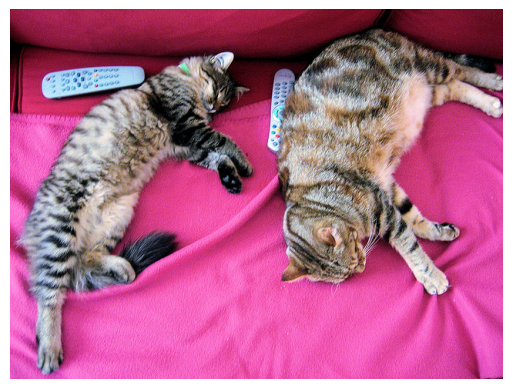

Egyptian cat 0.9374414682388306
tabby, tabby cat 0.03844264894723892


In [ ]:
image_classifier = pipeline("image-classification")

image_url = "http://images.cocodataset.org/val2017/000000039769.jpg"
response = requests.get(image_url)
image = Image.open(BytesIO(response.content))

classification_results = image_classifier(image)


plt.imshow(image)
plt.axis("off")
plt.show()


for classes in classification_results[:2]:
  print(classes['label'], classes['score'])

## Object Detection

No model was supplied, defaulted to facebook/detr-resnet-50 and revision 1d5f47b (https://huggingface.co/facebook/detr-resnet-50).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/102M [00:00<?, ?B/s]

/usr/local/lib/python3.12/dist-packages/torch/nn/modules/module.py:2446: UserWarning: for conv1.weight: copying from a non-meta parameter in the checkpoint to a meta parameter in the current model, which is a no-op. (Did you mean to pass `assign=True` to assign items in the state dictionary to their corresponding key in the module instead of copying them in place?)
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torch/nn/modules/module.py:2446: UserWarning: for bn1.weight: copying from a non-meta parameter in the checkpoint to a meta parameter in the current model, which is a no-op. (Did you mean to pass `assign=True` to assign items in the state dictionary to their corresponding key in the module instead of copying them in place?)
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torch/nn/modules/module.py:2446: UserWarning: for bn1.bias: copying from a non-meta parameter in the checkpoint to a meta parameter in the current model, which is a no-op. (Did you mean to pas

preprocessor_config.json:   0%|          | 0.00/290 [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.
Device set to use cpu


[{'score': 0.9982202649116516, 'label': 'remote', 'box': {'xmin': 40, 'ymin': 70, 'xmax': 175, 'ymax': 117}}, {'score': 0.9960021376609802, 'label': 'remote', 'box': {'xmin': 333, 'ymin': 72, 'xmax': 368, 'ymax': 187}}, {'score': 0.9954743981361389, 'label': 'couch', 'box': {'xmin': 0, 'ymin': 1, 'xmax': 639, 'ymax': 473}}, {'score': 0.99880051612854, 'label': 'cat', 'box': {'xmin': 13, 'ymin': 52, 'xmax': 314, 'ymax': 470}}, {'score': 0.9986783862113953, 'label': 'cat', 'box': {'xmin': 345, 'ymin': 23, 'xmax': 640, 'ymax': 368}}]


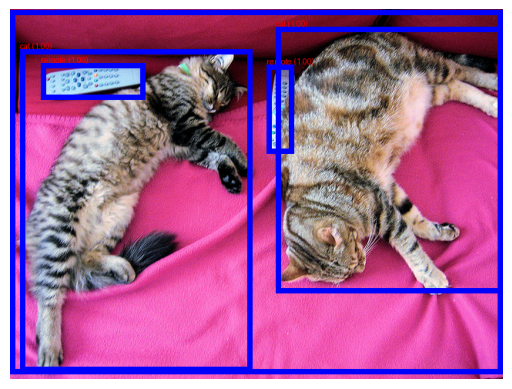

In [ ]:
object_detector = pipeline("object-detection")

image_url = "http://images.cocodataset.org/val2017/000000039769.jpg"
response = requests.get(image_url)
image = Image.open(BytesIO(response.content))

detection_results = object_detector(image)
print(detection_results)

draw = ImageDraw.Draw(image)
for obj in detection_results:
    box = obj["box"]
    label = obj["label"]
    score = obj["score"]

    draw.rectangle(
        [(box["xmin"], box["ymin"]), (box["xmax"], box["ymax"])],
        outline="blue", width=7
    )
    # label + score
    draw.text((box["xmin"], box["ymin"] - 10), f"{label} ({score:.2f})", fill="red")


plt.imshow(image)
plt.axis("off")
plt.show()

## Image Segmentation

In [ ]:
image_segmentor = pipeline("image-segmentation")

image_url = "http://images.cocodataset.org/val2017/000000039769.jpg"
response = requests.get(image_url)
image = Image.open(BytesIO(response.content))

segmentation_results = image_segmentor(image)
print(segmentation_results)

plt.figure(figsize=(6,6))
plt.imshow(image)
plt.axis("off")
plt.title("Original Image")
plt.show()

plt.figure(figsize=(12, 12))
for i, result in enumerate(segmentation_results):
    mask = result["mask"]  # segmentation mask
    label = result["label"]
    plt.subplot(1, len(segmentation_results), i+1)
    plt.imshow(mask)
    plt.axis("off")
    plt.title(label)

plt.show()

## Translation

In [ ]:
translator = pipeline('translation', model='Helsinki-NLP/opus-mt-en-fr')
english_text = "Hello, how are you today?"
translated_text = translator(english_text)

print(translated_text)

## Zero-Shot Classification

In [ ]:
zero_shot_classifier = pipeline('zero-shot-classification')
sequence_to_classify = "This is a great movie about the future of AI."
candidate_labels = ["politics", "technology", "entertainment", "business"]
classification_results = zero_shot_classifier(sequence_to_classify, candidate_labels)

print(classification_results)

## Image Captioning

In [ ]:
image_captioner = pipeline('image-to-text', model="Salesforce/blip-image-captioning-base")
print("Image-to-text pipeline loaded.")

image_url = "http://images.cocodataset.org/val2017/000000039769.jpg"

response = requests.get(image_url)
image = Image.open(BytesIO(response.content))

caption_results = image_captioner(image)
print("Generated Caption:", caption_results)

plt.imshow(image)
plt.axis("off")
plt.title(caption_results[0]["generated_text"], fontsize=12, color="blue")
plt.show()

## Image generation with diffusion models

## Assignment: Image Generation with Diffusion Models

For this assignment, you will explore the use of diffusion models for image generation using the Hugging Face `transformers` library.

Take any model from https://huggingface.co/stabilityai

**Task:**

1.  **Choose a Diffusion Model:** Select a diffusion model available on the Hugging Face Hub. You can explore models from popular libraries like `diffusers`.
2.  **Load the Pipeline:** Load the appropriate pipeline for image generation using the chosen diffusion model.
3.  **Generate Images:** Generate one or more images using the pipeline with different prompts and parameters.
4.  **Display and Discuss:** Display the generated images and write a brief discussion about:
    *   The model you chose and why.
    *   The prompts and parameters you used for generation.
    *   Your observations about the quality and characteristics of the generated images.
    *   Any challenges or interesting findings you encountered.

**Requirements:**

*   Your code should be in a new code cell following this markdown section.
*   Clearly indicate the model you are using in your code or discussion.
*   Use `matplotlib` or other appropriate libraries to display the generated images within the notebook.
*   Provide a clear and concise discussion of your work in a markdown cell below the code.

This assignment will give you hands-on experience with state-of-the-art image generation techniques using the powerful tools provided by Hugging Face.

In [ ]:
from diffusers import DiffusionPipeline

pipe = DiffusionPipeline.from_pretrained("stabilityai/stable-diffusion-2-base")
print("Text-to-Image pipeline loaded.")

prompt = "A fantasy landscape with castles and dragons"
image_results = pipe(prompt, num_inference_steps=25)
print("Generated Image for the prompt:", prompt)

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/537 [00:00<?, ?B/s]

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

config.json:   0%|          | 0.00/738 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/929 [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

text_encoder/model.safetensors:   0%|          | 0.00/1.36G [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

config.json:   0%|          | 0.00/716 [00:00<?, ?B/s]

vae/diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

unet/diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.46G [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

Text-to-Image pipeline loaded.


  0%|          | 0/25 [00:00<?, ?it/s]

Generated Image for the prompt: A fantasy landscape with castles and dragons


In [ ]:
import matplotlib.pyplot as plt

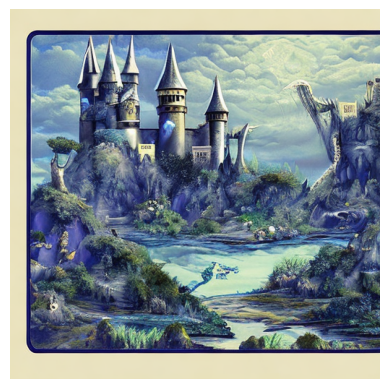

In [ ]:
plt.imshow(image_results.images[0])
plt.axis("off")
plt.show()

In [ ]:
# Save the generated image as a JPG file
image_results.images[0].save("generated_image.jpg")
print("Image saved as generated_image.jpg")

Image saved as generated_image.jpg
